# KELOMPOK 4 PADANG CUISINE (Indonesian Food Image Dataset)
# Al-Inayya 2009106127
# Muh. Rizeky Rahmatullah 2009106114
# Agustinus Syama 2009106150

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from keras_preprocessing.image import ImageDataGenerator

## **Normalize Image Pixels**

In [2]:
#Al-Inayya

training_path = r'D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\training'
validation_path = r'D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\validation'
testing_path = r'D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\testing'

In [3]:
image_data_generator = ImageDataGenerator(
    rescale=1./255
)

In [4]:
training_generator = image_data_generator.flow_from_directory(
    training_path,
    target_size=(128, 128),
    batch_size=64,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical'
)

validation_generator = image_data_generator.flow_from_directory(
    validation_path,
    target_size=(128, 128),
    batch_size=8,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical'
)

testing_generator = image_data_generator.flow_from_directory(
    testing_path,
    target_size=(128, 128),
    batch_size=8,
    color_mode='rgb',
    shuffle=True,
    class_mode='categorical'
)

Found 813 images belonging to 9 classes.
Found 90 images belonging to 9 classes.
Found 90 images belonging to 9 classes.


# Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=[128, 128, 3]),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax'),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [7]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
hasil_model = model.fit(
    training_generator,
    epochs=30,
    validation_data= validation_generator
)

Epoch 1/30
13/13 [==============================] - 6s 398ms/step - loss: 2.1838 - accuracy: 0.1599 - val_loss: 2.1171 - val_accuracy: 0.2444
Epoch 2/30
13/13 [==============================] - 5s 370ms/step - loss: 1.9687 - accuracy: 0.2595 - val_loss: 1.7477 - val_accuracy: 0.3000
Epoch 3/30
13/13 [==============================] - 5s 396ms/step - loss: 1.6558 - accuracy: 0.3592 - val_loss: 1.4854 - val_accuracy: 0.4778
Epoch 4/30
13/13 [==============================] - 5s 396ms/step - loss: 1.4937 - accuracy: 0.4071 - val_loss: 1.5246 - val_accuracy: 0.3889
Epoch 5/30
13/13 [==============================] - 5s 398ms/step - loss: 1.4133 - accuracy: 0.4613 - val_loss: 1.3188 - val_accuracy: 0.4778
Epoch 6/30
13/13 [==============================] - 5s 373ms/step - loss: 1.2935 - accuracy: 0.5031 - val_loss: 1.2587 - val_accuracy: 0.5556
Epoch 7/30
13/13 [==============================] - 5s 378ms/step - loss: 1.2526 - accuracy: 0.5117 - val_loss: 1.3134 - val_accuracy: 0.4333
Epoch 

In [9]:
model.evaluate(testing_generator)

12/12 [==============================] - 0s 14ms/step - loss: 1.6033 - accuracy: 0.6222


[1.6032880544662476, 0.6222222447395325]

## Visualisasi Model

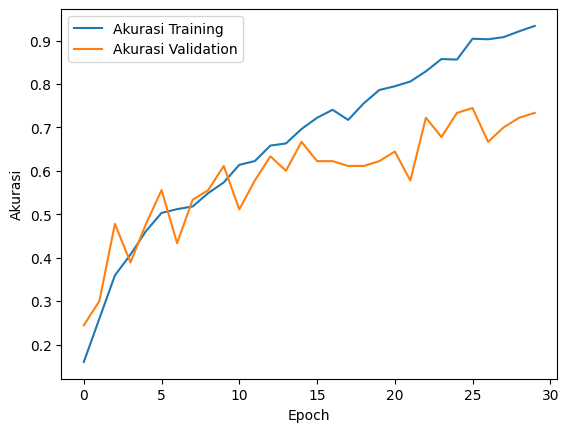

In [10]:
#Agustinus

#Accuracy

plt.plot(hasil_model.history['accuracy'], label='Akurasi Training')
plt.plot(hasil_model.history['val_accuracy'], label='Akurasi Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.show()

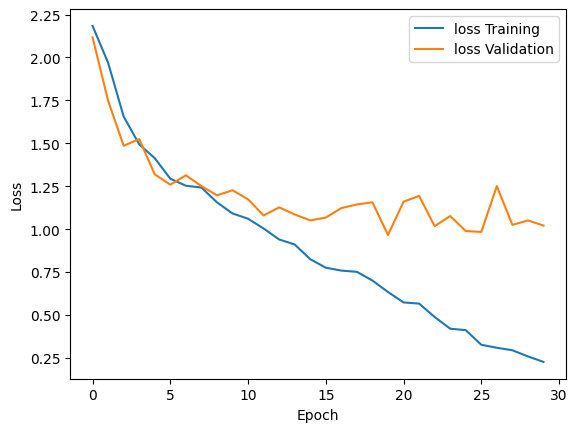

In [11]:
#Loss

plt.plot(hasil_model.history['loss'], label='loss Training')
plt.plot(hasil_model.history['val_loss'], label='loss Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Predict

In [12]:
image, label = testing_generator.next()

In [13]:
labelsPred = ['ayam_goreng', 'ayam_pop', 'daging_rendang', 'dendeng_batokok', 'gulai_ikan','gulai_tambusu','gulai_tunjang','telur_balado','telur_dadar']

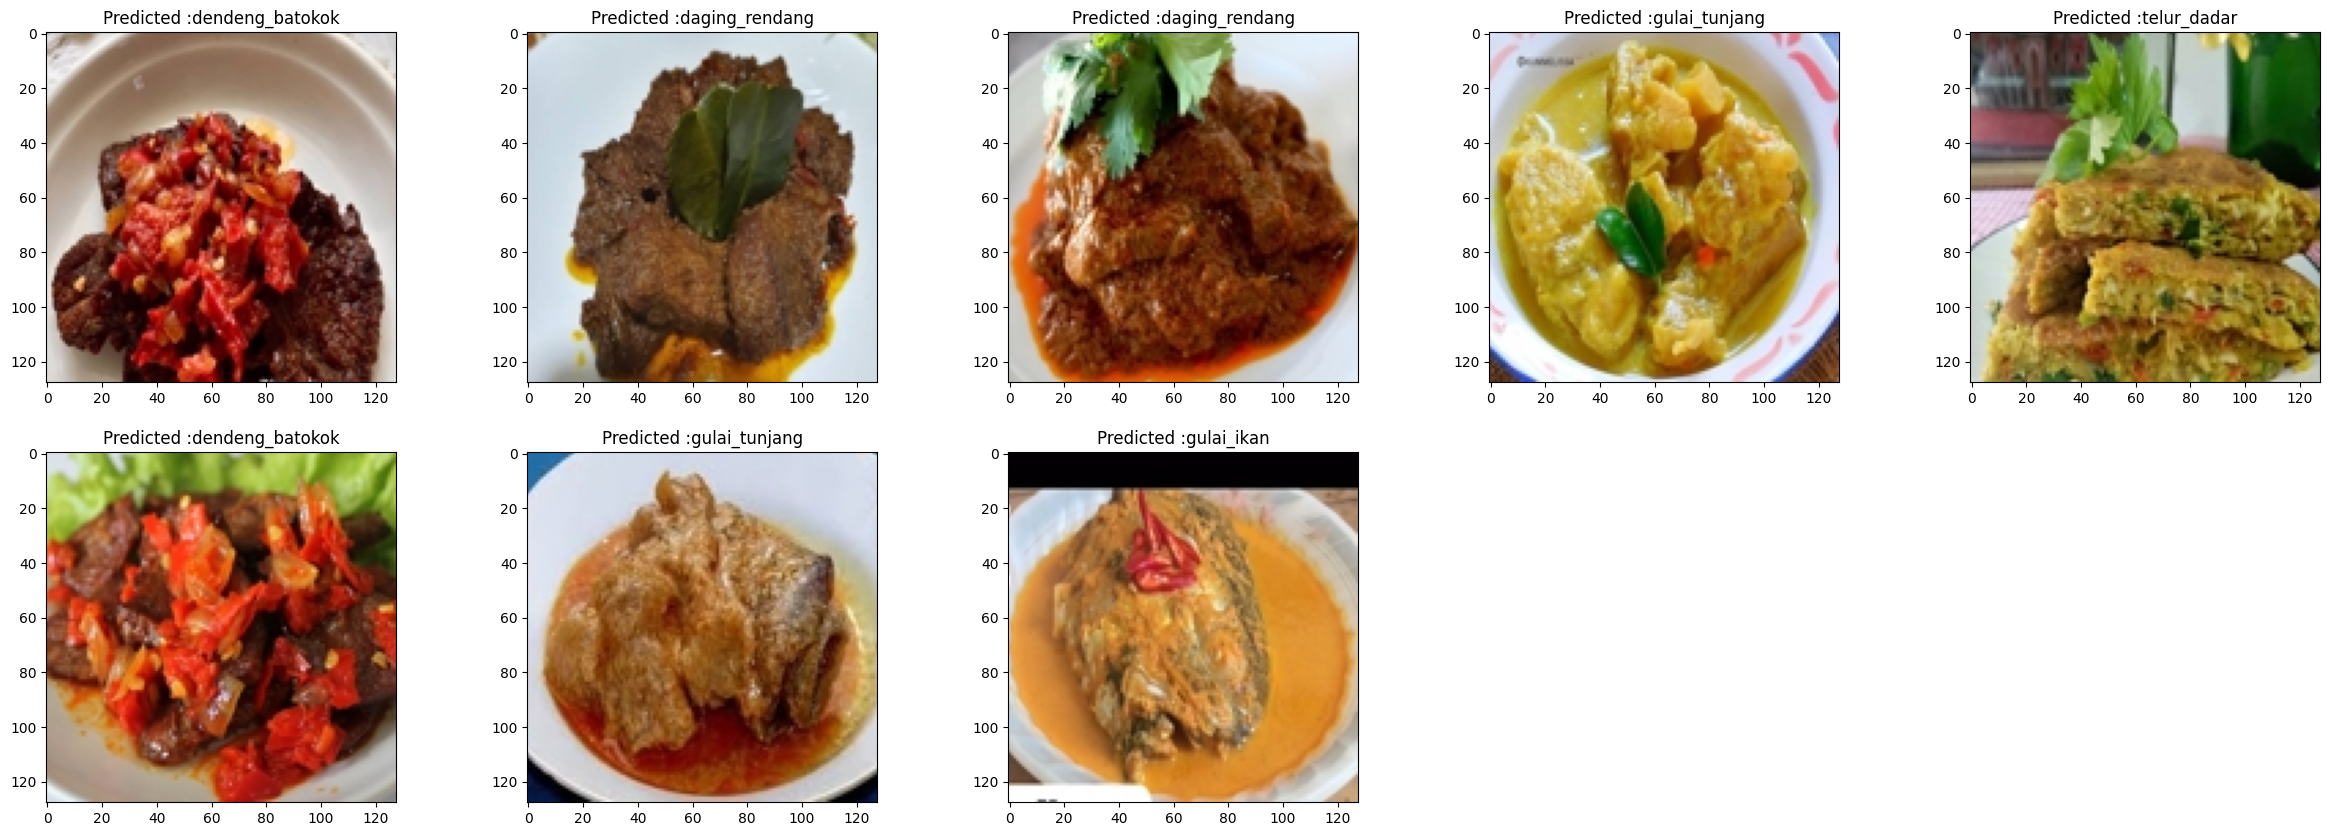

In [14]:
fig = plt.figure(figsize = (30,10))

isi = 8
for i in range(isi):
    plt.subplot(2, 5, i+1)
    plt.title(f'Predicted :{labelsPred[tf.argmax(label[i])]}')
    plt.imshow(image[i])


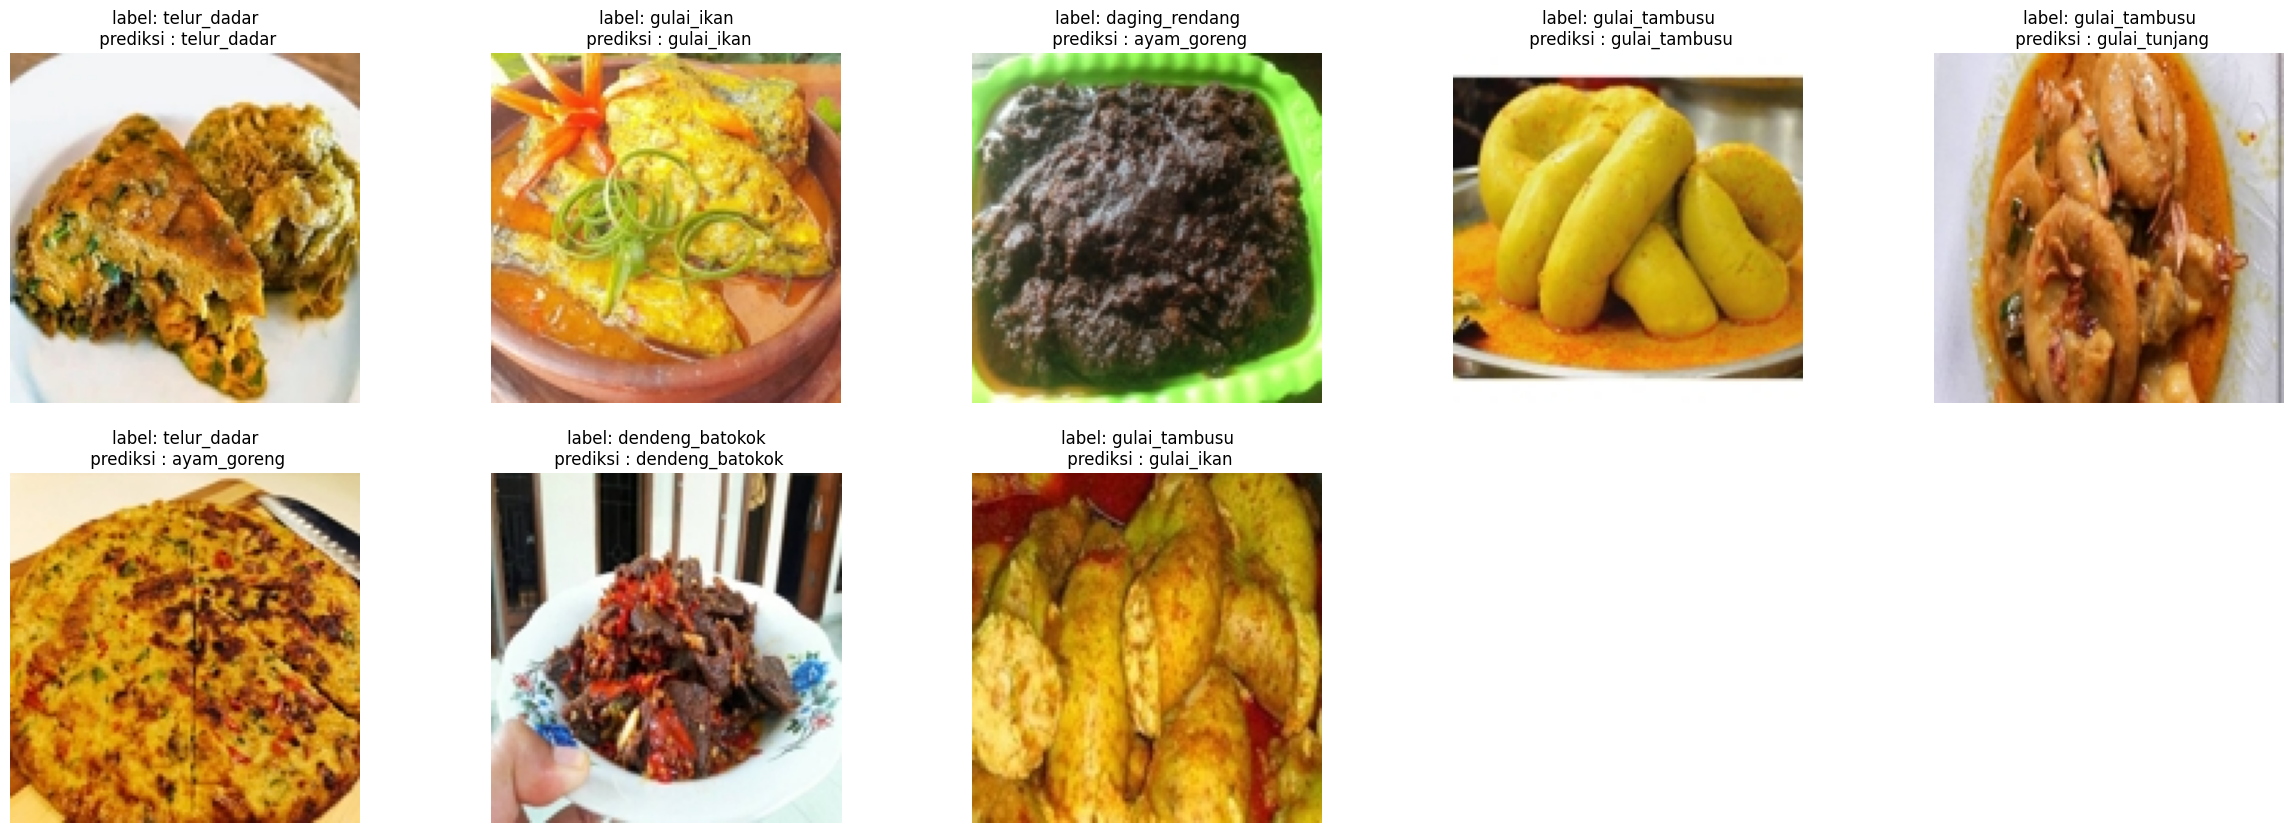

In [15]:
image ,label = next(iter(testing_generator))

plt.figure(figsize=(30,10))
for i in range(8) :
    TrueLabel = labelsPred[np.argmax(label[i])]
    plt.subplot(2,5,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\n prediksi : {labelsPred[y_pred]}')

In [16]:
model.save('model/padang_food_classification.h5')